In [2]:
# read DICOM data lib
# ref. https://pydicom.github.io/pydicom
import pydicom
# dicom parser
# ref. https://pypi.org/project/dicompyler-core/
import dicompylercore
from dicompylercore import dicomparser
# array process
# ref. https://numpy.org
# Chinese ref. https://blog.techbridge.cc/2017/07/28/data-science-101-numpy-tutorial/
import numpy as np
# store array
import pickle
# for system operation
import sys
# image
import PIL.Image
import matplotlib.pyplot as plt
from PIL.Image import fromarray
import os
import cv2
import PIL # optional

In [4]:
def normalize(array):
    x,y = array.shape
    maximum = max(np.unique(array))
#     minimum = min(np.unique(array))
#     print(minimum)
    print(maximum)
    if maximum != 0:
        array = array / (maximum) * 255
        for i in range(0,512):
            for j in range(0,512):
                array[i,j] = int((round(float(array[i,j]) , 0)))
    array = array.astype(np.uint8)
    return array        

2820
[-0600, -0600]
2820


True

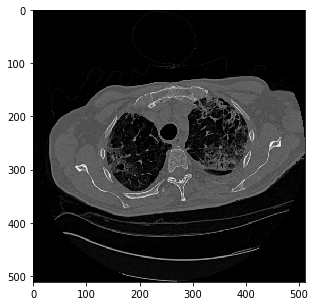

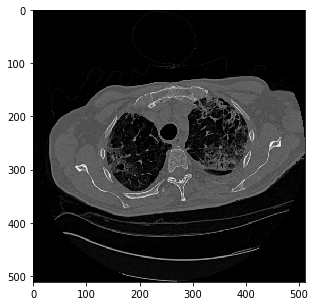

In [5]:
plt.figure(figsize=(5,5))
plt.figure(1)
ds = pydicom.dcmread("../ILD_DB_volumeROIs/3/CT-7358-0007.dcm")
array = normalize(ds.pixel_array)
plt.imshow(array , 'gray')
cv2.imwrite("../1.jpg" , array)
print(ds.WindowCenter)
ds.WindowCenter = -650
ds.WindowWidth = 1600
ds.save_as("../test.dcm")

ds = pydicom.dcmread("../test.dcm")
arr = normalize(ds.pixel_array)
plt.figure(figsize=(5,5))
plt.figure(2)
plt.imshow(arr , 'gray')
cv2.imwrite("../2.jpg" , arr)